### 1.复习上课内容。

### 2.理论题

1. Why we need $\gamma$ in reinforcement learning ?

衰退系数γ相当与给不同时间的奖励设置了权重。γ=1说明每个时刻的奖励同等重要，γ<1则表示现在的奖励比未来的奖励重要。通常来讲，近期的奖励会重要一些。所以γ会小于1。γ小于1还带来另一个好处。G表示未来奖励的累加。对于无限时间序列状态的模型，如果没有衰退系统γ，G就不收敛，无法求出来。有了小于1的γ，G就会收敛。

2. Please breifly explain what is value function and what is Q function ?

价值函数V等于状态为s时，按照策略π行动后，在未来所获得反馈值G的期望值。  
Q函数是动作-价值函数，就是状态为s，采取a动作时后，在未来所获得反馈值G的期望值。  

3. How temperal difference related to dynamic programming and monte-carlo methods ?

在策略评估阶段，最直接的办法就是基于动态规划来更新价值函数，使用迭代的方法求解贝尔曼方程。然而这个方法有缺陷：  
1、需要事先知道状态转移概率  
2、无法处理状态集合大小无限的情况  

当我们不知道状态转移概率时，就可以采用蒙特卡洛采样的方法来更新价值函数。蒙特卡洛采样就是对下一状态随机取值么，就不用预先知道概率。
然而这个方法也有缺陷：  
1、状态集合比较大时，采样的轨迹可能非常稀疏，不利于估计期望  
2、在实际问题中，最终反馈需要在终止状态才能知晓，导致反馈周期较长  

为了克服蒙特卡洛采样方法的缺陷，于是提出了时序差分的方法来更新价值函数。
用老的Vπ(s)与新的Vπ(s)的估计值（R+Vπ(s')）之间的差值来更新价值函数。

4. Please briefly describe what are value iteration and policy iteration ?

值迭代的思路是，计算出动作-价值函数q(s,a)。而策略函数基于q函数来计算，直接取argmax q(s,a)对应的a动作就可以了。循环更新，直到动作-价值函数误差小于阈值。  
策略迭代的思路是，先计算值函数，再计算策略函数，循环更新两个函数，直到策略函数稳定。

5. How can we use deep lerning in reinforcement learning ?

在状态数量太多时， qπ(s,a)函数不可能用一张表来记录，而且有些状态可能始终无法采样到，所以可以用一个基于DL的非线性回归模型来拟合q函数。由于回归函数的连续型，没有探索过的状态也可以通过函数计算出来。损失函数是q的估计值与当前值之间的平方差。

### 选做题 （实践）

In [148]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.table import Table

In [149]:
def draw_image(image):
    fig,ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax,bbox=[0,0,1,1])

    nrows,ncols = image.shape
    width,height = 1.0/ncols,1.0/nrows

    for (i,j), val in np.ndenumerate(image):
        if (i,j) == (0,1):
            val = "A"
        elif (i,j) == (0,3):
            val = "B"
        elif (i,j) == (4,1):
            val = "A'"
        elif (i,j) == (2,3):
            val = "B'"
        tb.add_cell(i,j,width,height,text=val,
                    loc='center',facecolor='white')

    for i in range(len(image)):
        tb.add_cell(i,-1,width,height,text=i+1,loc='right',
                    edgecolor='none',facecolor='none')
        tb.add_cell(-1,i,width,height/2,text=i+1,loc='center',
                    edgecolor='none',facecolor='none')
    ax.add_table(tb)

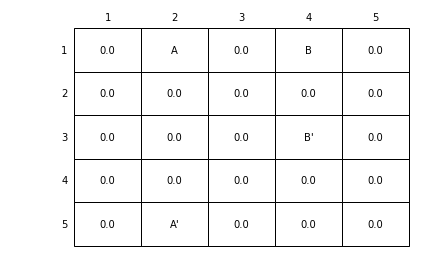

In [150]:
WORLD_SIZE=5
draw_image(np.zeros((WORLD_SIZE,WORLD_SIZE)))

Figure above shows a rectangular gridworld. The cell of the grid correspond to the state of the environment. At each cell, four actions with equal probability are possible: north, south, east and west, which deterministically cause the agent to move one cell in the respective direction on the grid. Actions that would take the agent off the grid leave its unchanged, but also result in a reward -1. Other actions result in a reward of 0, expect those taht move the agent out of the special states A and B. From state A, all four actions yield a reward of +10 and take the agent to A'. From state B, all actions yield a reward of +5 and take the agent to B'. 

#### Try to compute the value of each state ? You can choose any algorithms we leanred in the class.
Good luck and happy new year. !!

In [163]:
# Vπ(s) = max(qπ(s,a))  
# 就是格子的V值取这个状态S的四个动作能导致的最大价值。
# 用的是老师的参考代码，就改了几行算法和显示的代码

In [164]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.table import Table

WORLD_SIZE = 5
ACTION_SIZE = 4

A_POS = [0,1]
A_PRIME_POS = [4,1]
B_POS = [0,3]
B_PRIME_POS = [2,3]
DISCOUNT = 0.9

ACTIONS = [np.array([0,-1]),
           np.array([-1,0]),
           np.array([0,1]),
           np.array([1,0])]
ACTION_PROB = 0.25

def step(state,action):
    if state == A_POS:
        return A_PRIME_POS,10
    if state == B_POS:
        return B_PRIME_POS,5
    next_state = (np.array(state)+action).tolist()
    x,y = next_state
    if x < 0 or x >= WORLD_SIZE or \
            y < 0 or y >= WORLD_SIZE:
        reward = -1.0
        next_state = state
    else:
        reward = 0
    return next_state, reward

def draw_image(image):
    fig,ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax,bbox=[0,0,1,1])

    nrows,ncols,_ = image.shape
    width,height = 1.0/ncols,1.0/nrows

    for i in range(nrows):
        for j in range(ncols):
            tb.add_cell(i,j,width,height,text=image[i,j].max(),
                        loc='center',facecolor='white')

    for i in range(len(image)):
        tb.add_cell(i,-1,width,height,text=i+1,loc='right',
                    edgecolor='none',facecolor='none')
        tb.add_cell(-1,i,width,height/2,text=i+1,loc='center',
                    edgecolor='none',facecolor='none')
    ax.add_table(tb)
    
def draw_image_2(image):
    fig,ax = plt.subplots(figsize=(9,6))
    ax.set_axis_off()
    tb = Table(ax,bbox=[0,0,1,1])

    nrows,ncols,_ = image.shape
    width,height = 1.0/ncols,1.0/nrows

    for i in range(nrows):
        for j in range(ncols):
            a = image[i,j].argmax()
            v = image[i,j].max()
            text = str(v)
            if image[i,j,0] == v:
                text = '← ' + text
            if image[i,j,2] == v:
                text = text + ' →'
            if image[i,j,1] == v:
                text = '↑\n' + text
            if image[i,j,3] == v:
                text = text + '\n↓'
            
            tb.add_cell(i,j,width,height,text=text,
                        loc='center',facecolor='white')

    for i in range(len(image)):
        tb.add_cell(i,-1,width,height,text=i+1,loc='right',
                    edgecolor='none',facecolor='none')
        tb.add_cell(-1,i,width,height/2,text=i+1,loc='center',
                    edgecolor='none',facecolor='none')
    ax.add_table(tb)

In [165]:
def results():
    value= np.zeros((WORLD_SIZE,WORLD_SIZE,4))
    while True:
        new_value = np.zeros_like(value)
        for i in range(WORLD_SIZE):
            for j in range(WORLD_SIZE):
                for a in range(ACTION_SIZE):
                    action = ACTIONS[a]
                    (next_i,next_J),reward = step([i,j],action)
                    new_value[i,j,a] = reward+DISCOUNT*value[next_i,next_J].max()

        if np.sum(np.abs(value-new_value)) < 1e-4:
            draw_image_2(np.round(new_value,decimals=2))
            plt.show()
            break
        value = new_value

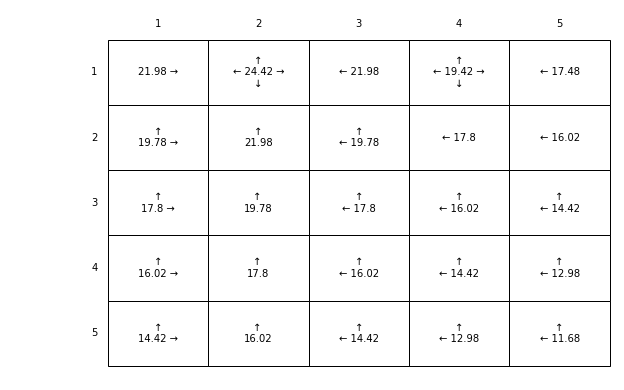

In [166]:
results()